In [265]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [266]:
dataFrame = pd.read_csv('GlobalTemperatures.csv')
dataFrame.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
dataFrame.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [268]:
dataFrame.shape

(3192, 9)

In [269]:
dataFrame.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [270]:
dataFrame.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [271]:
dataFrame.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [272]:
d1 = dataFrame.iloc[: ,:2]
d1.head()


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [273]:
data = d1['LandAverageTemperature']
mean_temp = data.mean()
variance = data.var()
std = data.std()

print('Mean temperature throughout the years: %.3f celsius' % mean_temp )
print('Temperature variance throughout the dataset : %.3f celsius squared' % variance)
print('Temperature standard deviation throughout the dataset: %.3f celsius' % std)


Mean temperature throughout the years: 8.375 celsius
Temperature variance throughout the dataset : 19.196 celsius squared
Temperature standard deviation throughout the dataset: 4.381 celsius


In [274]:
times = pd.DatetimeIndex(d1['dt'])
grouped = d1.groupby([times.year]).mean()

In [275]:
dataFrame.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


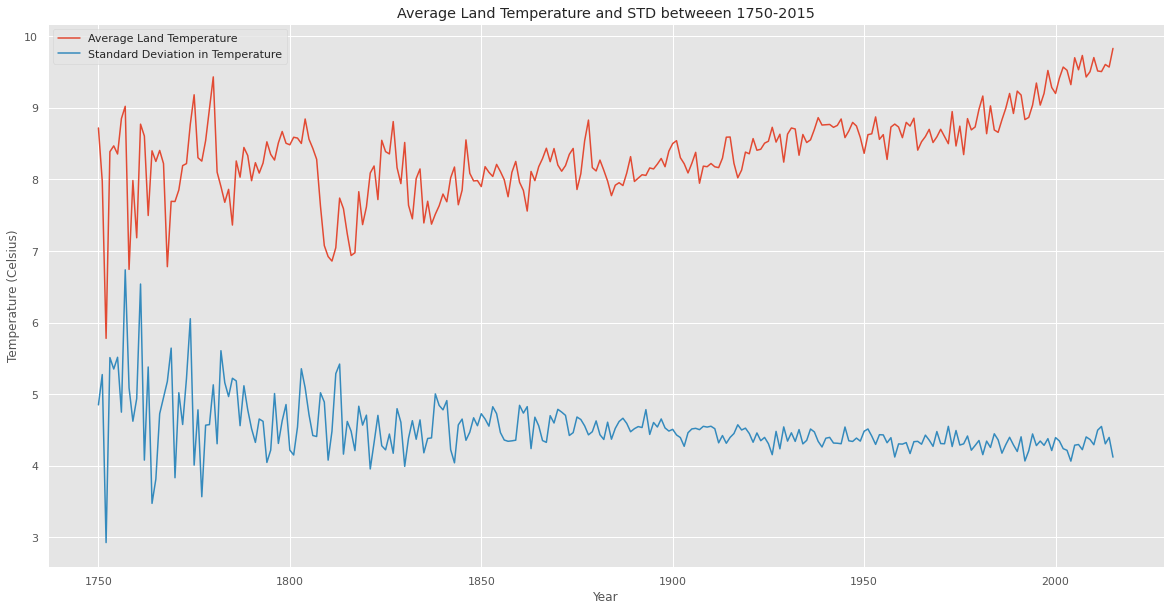

In [276]:
plt.figure(figsize=(20,10))
std_grouped =d1.groupby([times.year]).std()
plt.plot(grouped['LandAverageTemperature'])
plt.plot(std_grouped['LandAverageTemperature'])
plt.title('Average Land Temperature and STD betweeen 1750-2015')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Average Land Temperature','Standard Deviation in Temperature'])
plt.show()

In [277]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [278]:
grouped.tail()

,LandAverageTemperature
dt,
2011,9.516000
2012,9.507333
2013,9.606500
2014,9.570667
2015,9.831000


In [279]:
d1[times.year ==1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


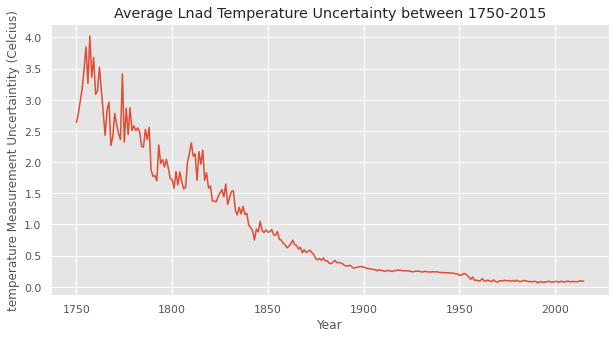

In [280]:
d2=dataFrame[['dt','LandAverageTemperatureUncertainty']]
uncertainty_group = d2.groupby([times.year]).mean()
plt.figure(figsize =(10,5))
plt.plot(uncertainty_group['LandAverageTemperatureUncertainty'])
plt.title('Average Lnad Temperature Uncertainty between 1750-2015')
plt.xlabel('Year')
plt.ylabel('temperature Measurement Uncertaintity (Celcius)')
plt.show()

In [281]:
d1['LandAverageTemperature']=d1['LandAverageTemperature'].fillna(method='ffill')

In [282]:
min_max_df = dataFrame[['dt','LandMaxTemperature','LandMinTemperature']]
warmest_time_idx = min_max_df['LandMaxTemperature'].idxmax()
warmest_time=min_max_df.loc[warmest_time_idx]['dt']
max_temp =min_max_df['LandMaxTemperature'].max()
print('Highest temperature recorded : %.3f celsius in %s %s' % (max_temp,months[int(warmest_time.split('-')[1]) -1],
  warmest_time[:4]))

coldest_time_idx = min_max_df['LandMinTemperature'].idxmin()
coldest_time = min_max_df.loc[coldest_time_idx]['dt']
min_temp =min_max_df['LandMinTemperature'].min()
print('Lowest Temperatuire recorded  : %.3f celsius in %s %s '% (min_temp,months[int(coldest_time.split('-')[1])-1],coldest_time[ :4]))

warmest_year = grouped['LandAverageTemperature'].idxmax()
max_avg_temp =grouped.loc[warmest_year]['LandAverageTemperature']
print('\nWarmest year -> :%s : %.3f celsius' % (warmest_year,max_avg_temp))

coldest_year = grouped['LandAverageTemperature'].idxmin()
min_avg_temp = grouped.loc[coldest_year]['LandAverageTemperature']
print('Coldest year -> %s :%.3f celsius' % (coldest_year,min_avg_temp))



Highest temperature recorded : 21.320 celsius in July 2011
Lowest Temperatuire recorded  : -5.407 celsius in January 1857 

Warmest year -> :2015 : 9.831 celsius
Coldest year -> 1752 :5.780 celsius


In [283]:

first_year_df = d1[:12]
first_year_df = first_year_df.assign(month=pd.Series(months))
first_year_df.set_index("month",drop=True,inplace=True)
first_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_first'} ,inplace=True)

final_year_df =d1[-12:]
final_year_df.index = list(range(12))
final_year_df = final_year_df.assign(month=pd.Series(months))
final_year_df.set_index("month",drop=True,inplace =True)
final_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_final'},inplace=True)

frames = [first_year_df,final_year_df]
temp_variation = pd.concat(frames,axis=1)
temp_variation['diff'] = temp_variation['avg_temp_final']  - temp_variation['avg_temp_first']
temp_variation 

,dt,avg_temp_first,dt,avg_temp_final,diff
month,,,,,
January,1750-01-01,3.034,2015-01-01,3.881,0.847
February,1750-02-01,3.083,2015-02-01,4.664,1.581
March,1750-03-01,5.626,2015-03-01,6.740,1.114
April,1750-04-01,8.490,2015-04-01,9.313,0.823
May,1750-05-01,11.573,2015-05-01,12.312,0.739
June,1750-06-01,12.937,2015-06-01,14.505,1.568
July,1750-07-01,15.868,2015-07-01,15.051,-0.817
August,1750-08-01,14.750,2015-08-01,14.755,0.005
September,1750-09-01,11.413,2015-09-01,12.999,1.586


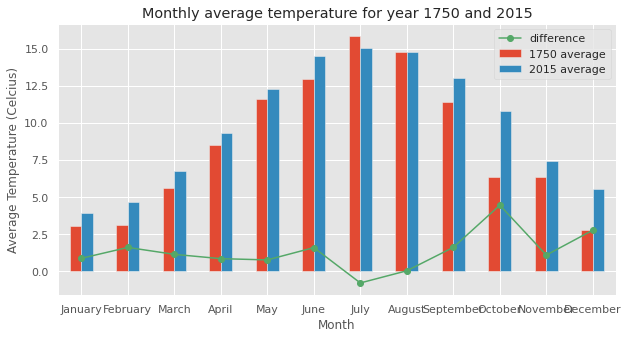

In [284]:
ax=plt.figure(figsize=(10,5)).gca()
temp_variation.plot(kind='bar', y=['avg_temp_first','avg_temp_final'],ax=ax)
temp_variation.plot(kind='line',y=['diff'],style='go-',ax=ax)
plt.title('Monthly average temperature for year 1750 and 2015')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celcius)')
plt.legend(['difference','1750 average', '2015 average'])
plt.show()

In [285]:
month_avg_group = d1.groupby([times.month]).mean()
month_avg_group.index = list(range(12))
month_avg_group = month_avg_group.assign(month=pd.Series(months))
month_avg_group.set_index("month",drop=True,inplace =True)

month_avg_group

,LandAverageTemperature
month,
January,2.275211
February,2.951695
March,4.956872
April,8.248688
May,11.129102
June,13.324323
July,14.283259
August,13.739406
September,11.710169


In [286]:
warmest_month = month_avg_group['LandAverageTemperature'].idxmax()
coldest_month = month_avg_group['LandAverageTemperature'].idxmin()

print('Warmest month  -> %s : %.3f celsius average temperature' % (warmest_month,month_avg_group.loc[warmest_month]['LandAverageTemperature']))
print('Coldest month  -> %s :%.3f celsius average temperature' % (coldest_month,month_avg_group.loc[coldest_month]['LandAverageTemperature']))


Warmest month  -> July : 14.283 celsius average temperature
Coldest month  -> January :2.275 celsius average temperature


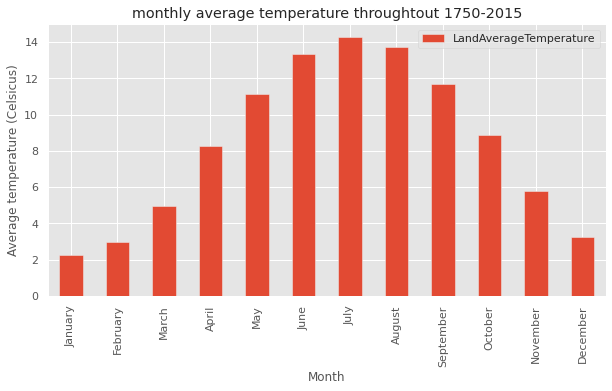

In [287]:
ax =plt.figure(figsize=(10,5)).gca()
month_avg_group.plot(kind='bar' , ax=ax)
plt.title('monthly average temperature throughtout 1750-2015')
plt.xlabel('Month')
plt.ylabel('Average temperature (Celsicus)')
plt.show()


In [288]:
month_var_group = min_max_df.groupby([times.month]).mean()
month_var_group.rename(columns={'LandMaxTemperature': 'max_temp'},inplace =True)
month_var_group.rename(columns={'LandMinTemperature':'min_temp'},inplace=True)

month_var_group.index =list(range(12))
month_var_group = month_var_group.assign(month=pd.Series(months))
month_var_group.set_index("month", drop=True,inplace=True)
month_var_group['diff'] = month_var_group['max_temp']- month_var_group['min_temp']
month_var_group






,max_temp,min_temp,diff
month,,,
January,8.178657,-2.934572,11.113229
February,8.921410,-2.672711,11.594120
March,11.137169,-0.866500,12.003669
April,14.290331,2.247699,12.042633
May,17.133729,5.179536,11.954193
June,19.226663,7.407331,11.819331
July,20.070217,8.423861,11.646355
August,19.646892,7.960934,11.685958
September,17.831620,6.138301,11.693319


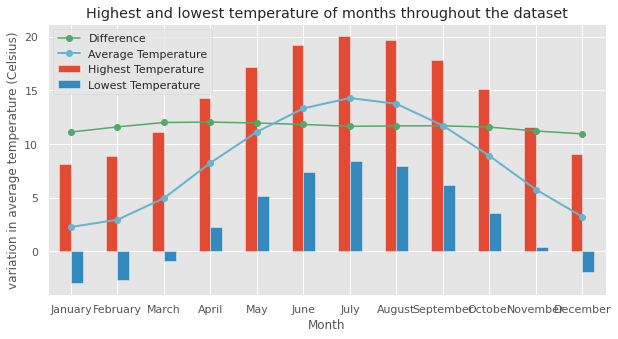

In [289]:
ax=plt.figure(figsize=(10,5)).gca()
month_var_group.plot(kind='bar' , y=['max_temp','min_temp'],ax=ax)
month_var_group.plot(kind='line',y=['diff'],style='go-',ax=ax)
month_avg_group.plot(kind='line',style='co-',linewidth=2.0,ax=ax)
plt.title('Highest and lowest temperature of months throughout the dataset')
plt.xlabel('Month')
plt.ylabel('variation in average temperature (Celsius)')
plt.legend(['Difference','Average Temperature','Highest Temperature','Lowest Temperature'])
plt.show()


In [290]:
print('Mean temperature difference : %.3f celsius' % (month_var_group['diff'].mean()))

Mean temperature difference : 11.607 celsius


Average temperatuire range: -2.080 celsius 


<Figure size 720x360 with 0 Axes>

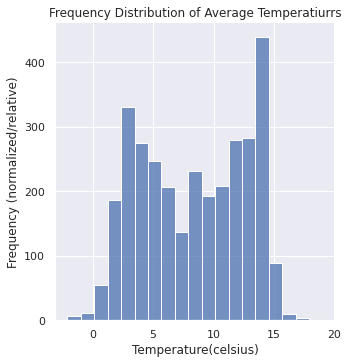

In [291]:
max_avg_temp = data.max()
min_avg_temp = data.min()

avg_temp_range = max_avg_temp = min_avg_temp
print('Average temperatuire range: %.3f celsius '% avg_temp_range)
sns.set()
plt.figure(figsize=(10,5))
sns.displot(data)
plt.title('Frequency Distribution of Average Temperatiurrs')
plt.xlabel('Temperature(celsius)')
plt.ylabel('Frequency (normalized/relative)')
plt.show()

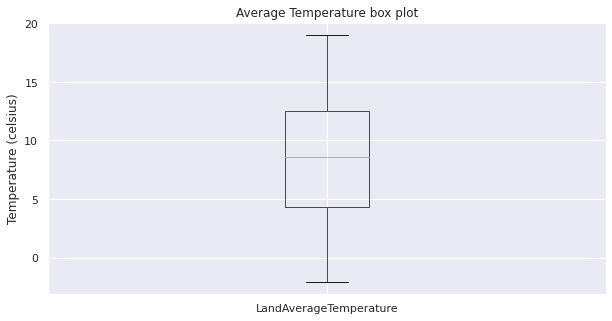

In [292]:
plt.figure(figsize=(10,5))
d1.boxplot(column='LandAverageTemperature')
plt.title('Average Temperature box plot')
plt.ylabel('Temperature (celsius)')
plt.show()

In [293]:
from sklearn.linear_model import LinearRegression as LinReg

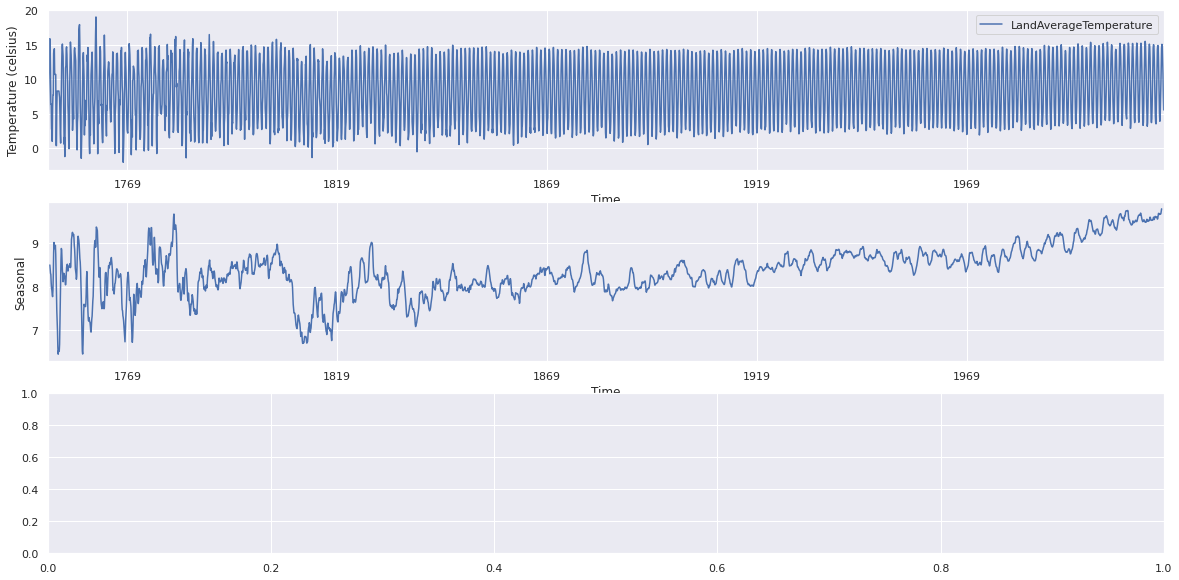

In [294]:
d1.index = times
res =sm.tsa.seasonal_decompose(d1['LandAverageTemperature'])
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,10))
d1.plot(ax=ax1)
ax1.set(xlabel='Time',ylabel='Temperature (celsius)')

res.trend.plot(ax=ax2)
ax2.set(xlabel='Time' ,ylabel='Seasonal')
plt.show()

In [295]:
from sklearn.linear_model import LinearRegression as LinReg

x=grouped.index.values.reshape(-1,1)
y=grouped['LandAverageTemperature'].values

reg =LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("ACCURACY: %.3f" % reg.score(x,y))

ACCURACY: 0.387


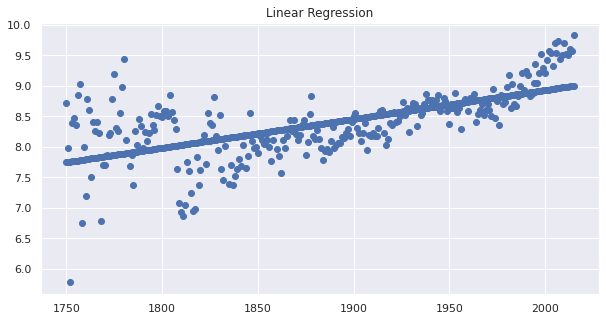

In [296]:
plt.figure(figsize = (10,5))
plt.title("Linear Regression")
plt.scatter(x =x ,y =y_preds)
plt.scatter(x=x,y=y ,c="b")
plt.show()

In [297]:
print('PREDICTED TEMPERATURE  IS :%.3f celsius' % reg.predict([[1900]])[0])

PREDICTED TEMPERATURE  IS :8.452 celsius
